In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
df=pd.read_csv('datasets/tips.csv')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


¿Se puede saber la propina que se va a dejar con alguna de las variables de total_bill, sex, day o time ? ¿A qué hora se deja la mayor cantidad de propina?


In [3]:
#Primero se reemplazan las variables de sex, time y day por números para poder hacer la regresión 

df['sex']=df.sex.replace({'Male':1, 'Female':2})
df['time']=df.time.replace({'Lunch':1,'Dinner' :2})
df['day']=df.day.replace({'Mon':1,'Thur':2, 'Fri': 3 ,'Sat':4,'Sun': 5})

In [4]:
#Primero se indican las variables a considerar 
vars= [ 'total_bill', 'tip', 'sex', 'time','day']

In [5]:
#Se hace la limpieza de variables y se declara el dataframe a considerar
df= df[vars].dropna()
df

,total_bill,tip,sex,time,day
0,16.99,1.01,2,2,5
1,10.34,1.66,1,2,5
2,21.01,3.50,1,2,5
3,23.68,3.31,1,2,5
4,24.59,3.61,2,2,5
...,...,...,...,...,...
239,29.03,5.92,1,2,4
240,27.18,2.00,2,2,4
241,22.67,2.00,1,2,4
242,17.82,1.75,1,2,4


Para saber que variables pueden tener algun impacto en los tips y utilizarlas en la regresión lineal se debe llevar a cabo un estudio de correlación entre variables. 

In [6]:
cc=df[['tip','total_bill','sex','time','day']].corr()
cc

,tip,total_bill,sex,time,day
tip,1.000000,0.675734,-0.088862,0.121629,0.135499
total_bill,0.675734,1.000000,-0.144877,0.183118,0.173693
sex,-0.088862,-0.144877,1.000000,-0.205231,-0.230791
time,0.121629,0.183118,-0.205231,1.000000,0.874366
day,0.135499,0.173693,-0.230791,0.874366,1.000000


Se puede notar que todas las variables tienen una correlación pequeña con tip, la que tiene la correlación que se acerca más a 1 es total_bill, con una fuerza de correlación alta, por lo que es la variable que se va a considerar para hacer la recta de regresión. Para visualizar y entender mejor la correlación se realizará un diagrama de disperción.  

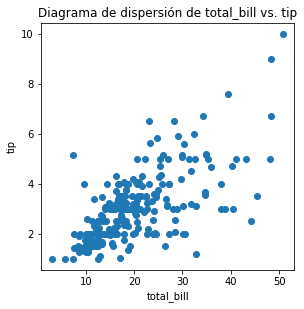

In [7]:
total_bill = df['total_bill']
tip = df['tip']

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(x=total_bill,
            y=tip)
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.title("Diagrama de dispersión de total_bill vs. tip")


plt.show()

Se puede notar que tiene una correlación positiva, pero si existen ciertos datos que se encuentran lejos de la recta de regresión, los cuales se pueden considerar como datos atípicos. 

In [8]:
#Ya con con los datos necesarios se puede llevar a cabo la prueba
#La ecuación que se quiere realizar es la siguiente
#tip= b0+total_bill*b1+sex*b2+time*b3

import statsmodels.api as sm
model= sm.OLS.from_formula('tip~total_bill', 
                          data=df)
result=model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           6.69e-34
Time:                        06:17:28   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""